### Lo scopo di questo cosice è quello di costruire una CNN per il riconoscimento dei caratteri hiragana (il dataset utilizzato viene costruito con il codice nel notebook Last Hiragana Dataset) tramite la libreria Tensorflow.

### Tutti il convulutional layers della CNN hanno un dropout con coefficiente posto a 0.2.

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow_datasets as tfds
from sklearn.metrics import f1_score
import sklearn

In [2]:
dataset_path = 'C:/Users/andma/OneDrive/Documenti/hiragana images/hiragana_images'

In [3]:
# Create the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, color_mode='grayscale', labels = 'inferred', image_size=(84, 84), validation_split=0.15, seed=42, subset='training'
)

Found 3000 files belonging to 50 classes.
Using 2550 files for training.


In [4]:
# Get the number of elements in the dataset
elements = tf.cast(dataset.cardinality(), tf.int64)
num_elements = elements.numpy()

# Split the dataset into a training set, a validation set, and a test set
train_dataset = dataset.take(int(0.7 * num_elements))
validation_dataset = dataset.skip(int(0.7 * num_elements)).take(int(0.15 * num_elements))
test_dataset = dataset.skip(int(0.85 * num_elements))

# Print the shapes of the datasets
print("Train dataset:", train_dataset.element_spec)
print("Validation dataset:", validation_dataset.element_spec)
print("Test dataset:", test_dataset.element_spec)

Train dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Validation dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Test dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling

In [6]:
img_height = 84
img_width = 84

filters = 32
num_classes = 50
dropout_coeff = 0.2

model = Sequential()

##### Rescaling layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 1)))

##### First convolution layer
model.add(Conv2D(filters, (3,3)))  #, input_shape = x_trainr.shape[1:]
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(39, 39)))

##### Second convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(17, 17)))

##### Third convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(8, 8)))

##### Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##### Fully Connected Layer #2
model.add(Dense(64))
model.add(Activation("relu"))

##### Last Fully Connected Layer, 50 Outputs
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 84, 84, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 82, 82, 32)        320       
                                                                 
 activation (Activation)     (None, 82, 82, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 41, 41, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 32)        9248      
                                                        

In [8]:
tf.keras.optimizers.Adam(learning_rate=0.001)

##### Compiling the Model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [9]:
# Traing with the second splitting of the dataset
epochs_data2 = 25

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='weights.best.hdf5', 
                             save_best_only=True, 
                             monitor='val_accuracy', 
                             mode='max', 
                             save_weights_only=True)

# Train the model
history_2 = model.fit(train_dataset, 
                      validation_data=validation_dataset, 
                      epochs=epochs_data2,
                      callbacks=[checkpoint])

Epoch 1/25
56/56 [==============================] - 19s 281ms/step - loss: 3.6766 - accuracy: 0.0709 - val_loss: 3.0505 - val_accuracy: 0.2083
Epoch 2/25
56/56 [==============================] - 15s 269ms/step - loss: 2.2772 - accuracy: 0.4057 - val_loss: 1.6660 - val_accuracy: 0.5547
Epoch 3/25
56/56 [==============================] - 15s 268ms/step - loss: 1.3207 - accuracy: 0.6367 - val_loss: 1.2493 - val_accuracy: 0.6693
Epoch 4/25
56/56 [==============================] - 15s 269ms/step - loss: 0.8554 - accuracy: 0.7522 - val_loss: 0.8072 - val_accuracy: 0.7917
Epoch 5/25
56/56 [==============================] - 15s 266ms/step - loss: 0.5837 - accuracy: 0.8326 - val_loss: 0.7453 - val_accuracy: 0.7865
Epoch 6/25
56/56 [==============================] - 15s 266ms/step - loss: 0.3744 - accuracy: 0.8856 - val_loss: 0.5724 - val_accuracy: 0.8750
Epoch 7/25
56/56 [==============================] - 15s 265ms/step - loss: 0.3243 - accuracy: 0.8996 - val_loss: 0.5492 - val_accuracy: 0.8594

In [10]:
print('loss = ', history_2.history['loss'][-1])
print('accuracy = ', history_2.history['accuracy'][-1])
print('val_loss = ', history_2.history['val_loss'][-1])
print('val_accuracy = ', history_2.history['val_accuracy'][-1])

loss =  0.030468251556158066
accuracy =  0.98828125
val_loss =  0.45434126257896423
val_accuracy =  0.9166666865348816


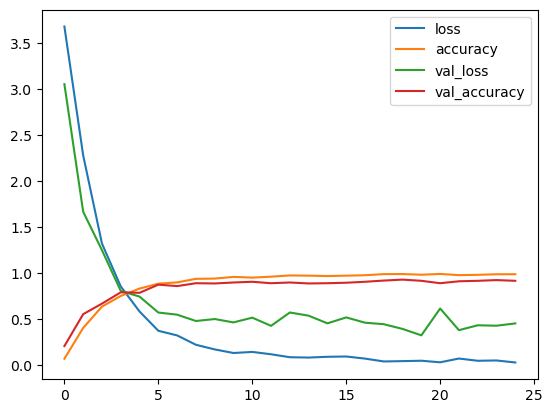

In [11]:
epoch_num = list(range(0, epochs_data2))
plt.plot(epoch_num, history_2.history['loss'], label = 'loss')
plt.plot(epoch_num, history_2.history['accuracy'], label = 'accuracy')
plt.plot(epoch_num, history_2.history['val_loss'], label = 'val_loss')
plt.plot(epoch_num, history_2.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [12]:
model.load_weights('weights.best.hdf5')

prediction = model.predict(test_dataset)

12/12 [==============================] - 3s 53ms/step


In [20]:
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = tf.argmax(prediction, axis=1).numpy()

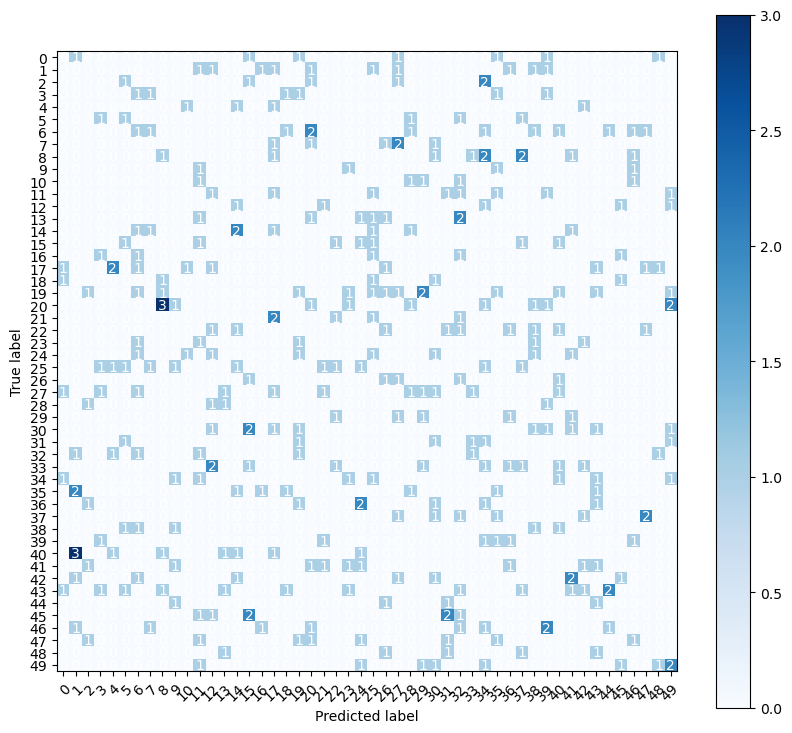

In [18]:
# Build the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_true, y_pred).numpy()

# creating the plot
fig, ax = plt.subplots(figsize=(10, 9))
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# setting the labels
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=range(conf_matrix.shape[1]), yticklabels=range(conf_matrix.shape[0]),
       ylabel='True label',
       xlabel='Predicted label')

# setting the plot properties
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# adding the values to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, conf_matrix[i, j],
                ha="center", va="center", color="white")

# showing the plot
plt.show()

In [22]:
# creating an F1 score metric
f1_metric = sklearn.metrics.f1_score(y_true, y_pred, average='micro')
print(f1_metric)

0.0106951871657754
